<a href="https://colab.research.google.com/github/Haniye-Rj/PathriseProject/blob/main/Ryanair_TOW_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#*Import* Dataset

In [1]:
from google.colab import files

In [2]:
uploaded= files.upload()

Saving TRAIN.xlsx to TRAIN.xlsx


# Import Libraries

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
!pip install scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import joblib
from tensorflow.keras.models import load_model


# DataSet understanding

In [4]:
df = pd.read_excel('TRAIN.xlsx')

In [5]:
df

DepartureDate  DepartureYear  DepartureMonth  DepartureDay  \
0        2016-01-10           2016              10             1   
1        2016-01-10           2016              10             1   
2        2016-01-10           2016              10             1   
3        2016-01-10           2016              10             1   
4        2016-01-10           2016              10             1   
...             ...            ...             ...           ...   
29726           NaT           2016              10            15   
29727           NaT           2016              10            15   
29728           NaT           2016              10            15   
29729           NaT           2016              10            15   
29730           NaT           2016              10            15   

       FlightNumber DepartureAirport ArrivalAirport    Route  \
0                11              STN            ATH  STN-ATH   
1                12              ATH            STN  ATH-STN   
2              1183              LGW            SNN  LGW-SNN   
3                14              ATH            STN  ATH-STN   
4                15              STN            ATH  STN-ATH   
...             ...              ...            ...      ...   
29726          9987              TPS            PSA  TPS-PSA   
29727          9992              PSA            MLA  PSA-MLA   
29728          9993              MLA            PSA  MLA-PSA   
29729          9994              PSA            PMO  PSA-PMO   
29730          9995              PMO            PSA  PMO-PSA   

       ActualFlightTime  ActualTotalFuel ActualTOW  FLownPassengers BagsCount  \
0                   185             7687     68696            149.0        43   
1                   207             9050     71489            179.0        85   
2                    64             2720     58447            127.0    (null)   
3                   209             9220     71399            189.0        83   
4                   184             7918     69458            176.0        59   
...                 ...              ...       ...              ...       ...   
29726                59             2750     65430            176.0        15   
29727                79             3400     63635            153.0        37   
29728                82             3500     62093            160.0        23   
29729                60             2780     64451            182.0        14   
29730                61             3000     65775            177.0        34   

      FlightBagsWeight  
0                  550  
1                 1110  
2               (null)  
3                 1080  
4                  770  
...                ...  
29726              200  
29727              480  
29728              299  
29729              180  
29730              440  

[29731 rows x 14 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DepartureDate     23819 non-null  datetime64[ns]
 1   DepartureYear     29731 non-null  int64         
 2   DepartureMonth    29731 non-null  int64         
 3   DepartureDay      29731 non-null  int64         
 4   FlightNumber      29731 non-null  int64         
 5   DepartureAirport  29731 non-null  object        
 6   ArrivalAirport    29731 non-null  object        
 7   Route             29731 non-null  object        
 8   ActualFlightTime  29731 non-null  int64         
 9   ActualTotalFuel   29731 non-null  int64         
 10  ActualTOW         29731 non-null  object        
 11  FLownPassengers   29636 non-null  float64       
 12  BagsCount         29731 non-null  object        
 13  FlightBagsWeight  29731 non-null  object        
dtypes: datetime64[ns](1), 

In [7]:
df.describe()

DepartureDate  DepartureYear  DepartureMonth  \
count                          23819        29731.0         29731.0   
mean   2016-06-25 06:15:58.528905728         2016.0            10.0   
min              2016-01-10 00:00:00         2016.0            10.0   
25%              2016-03-10 00:00:00         2016.0            10.0   
50%              2016-07-10 00:00:00         2016.0            10.0   
75%              2016-10-10 00:00:00         2016.0            10.0   
max              2016-12-10 00:00:00         2016.0            10.0   
std                              NaN            0.0             0.0   

       DepartureDay  FlightNumber  ActualFlightTime  ActualTotalFuel  \
count  29731.000000  29731.000000      29731.000000     29731.000000   
mean       7.987723   4814.133934        110.069221      4782.483536   
min        1.000000      1.000000          2.000000       600.000000   
25%        4.000000   2087.000000         73.000000      3210.000000   
50%        8.000000   4765.000000        105.000000      4530.000000   
75%       12.000000   7496.000000        140.000000      6010.000000   
max       15.000000   9998.000000       1504.000000     17890.000000   
std        4.313351   3062.612334         52.457470      2069.865460   

       FLownPassengers  
count     29636.000000  
mean        167.268626  
min           4.000000  
25%         163.000000  
50%         173.000000  
75%         179.000000  
max         189.000000  
std          20.177527

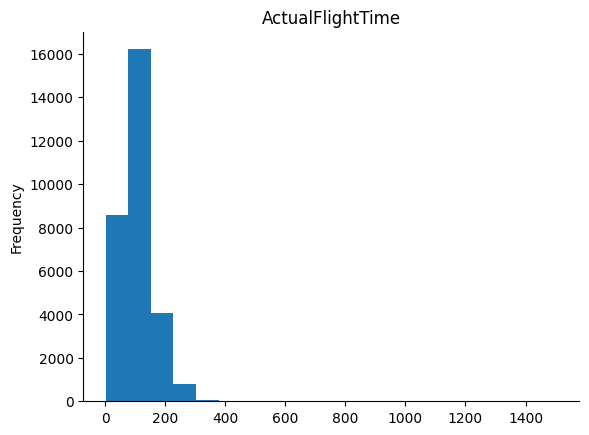

In [8]:
df['ActualFlightTime'].plot(kind='hist', bins=20, title='ActualFlightTime')
plt.gca().spines[['top', 'right',]].set_visible(False)

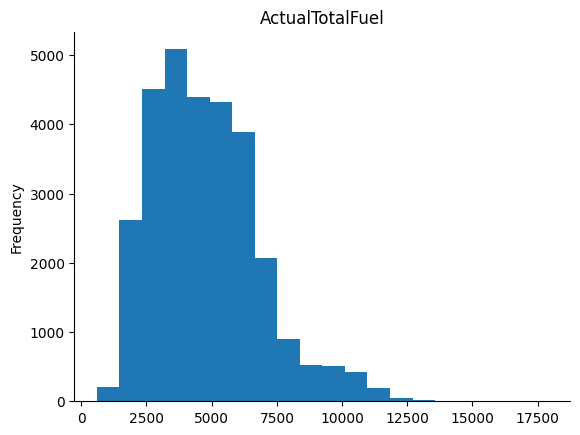

In [9]:
df['ActualTotalFuel'].plot(kind='hist', bins=20, title='ActualTotalFuel')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
len(set(df['Route'].unique()))

2667

In [11]:
len(set(df['DepartureAirport'].unique()))

191

In [12]:
len(set(df['ArrivalAirport'].unique()))

190

# Data Wrangling

The columns 'DepartureDate', 'DepartureYear', 'DepartureMonth','FlightNumber' do not bring value in this level. instead the columns 'DepartureDay' can recreate the dates and it is compelete.

In [13]:
df.drop(['DepartureDate', 'DepartureYear', 'DepartureMonth','FlightNumber'], axis=1, inplace=True)

In [14]:
df

DepartureDay DepartureAirport ArrivalAirport    Route  \
0                 1              STN            ATH  STN-ATH   
1                 1              ATH            STN  ATH-STN   
2                 1              LGW            SNN  LGW-SNN   
3                 1              ATH            STN  ATH-STN   
4                 1              STN            ATH  STN-ATH   
...             ...              ...            ...      ...   
29726            15              TPS            PSA  TPS-PSA   
29727            15              PSA            MLA  PSA-MLA   
29728            15              MLA            PSA  MLA-PSA   
29729            15              PSA            PMO  PSA-PMO   
29730            15              PMO            PSA  PMO-PSA   

       ActualFlightTime  ActualTotalFuel ActualTOW  FLownPassengers BagsCount  \
0                   185             7687     68696            149.0        43   
1                   207             9050     71489            179.0        85   
2                    64             2720     58447            127.0    (null)   
3                   209             9220     71399            189.0        83   
4                   184             7918     69458            176.0        59   
...                 ...              ...       ...              ...       ...   
29726                59             2750     65430            176.0        15   
29727                79             3400     63635            153.0        37   
29728                82             3500     62093            160.0        23   
29729                60             2780     64451            182.0        14   
29730                61             3000     65775            177.0        34   

      FlightBagsWeight  
0                  550  
1                 1110  
2               (null)  
3                 1080  
4                  770  
...                ...  
29726              200  
29727              480  
29728              299  
29729              180  
29730              440  

[29731 rows x 10 columns]

Replacing mean with Null values in the ActualTOW column.

In [15]:
df['ActualTOW'] = pd.to_numeric(df['ActualTOW'], errors='coerce')
mean_TOW = df['ActualTOW'].mean()
df['ActualTOW'].fillna(mean_TOW, inplace=True)

<ipython-input-15-d24b12bd1b93>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ActualTOW'].fillna(mean_TOW, inplace=True)


In [16]:
df['ActualTOW'].describe()

count    29731.000000
mean     65031.246638
std       3314.978436
min      42991.000000
25%      63145.000000
50%      65068.000000
75%      67136.000000
max      74283.000000
Name: ActualTOW, dtype: float64

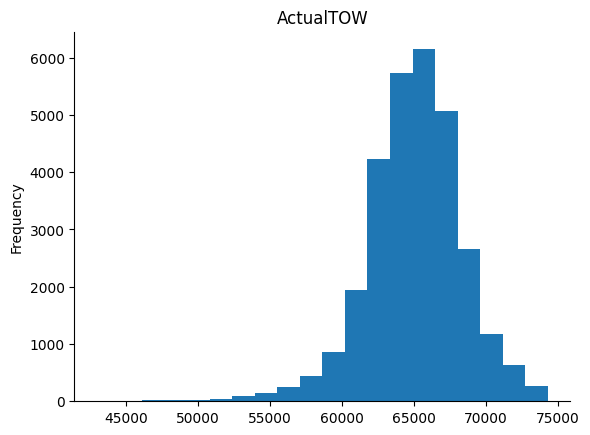

In [17]:
df['ActualTOW'].plot(kind='hist', bins=20, title='ActualTOW')
plt.gca().spines[['top', 'right',]].set_visible(False)
#normal distribiution

In [18]:
route_weights = df.groupby('Route')['ActualTOW'].median().sort_values(ascending=False).head(25)

In [19]:
route_weights = route_weights.reset_index()

<ipython-input-20-1caf286d8822>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=route_weights, x='ActualTOW', y='Route', palette='Blues_d')


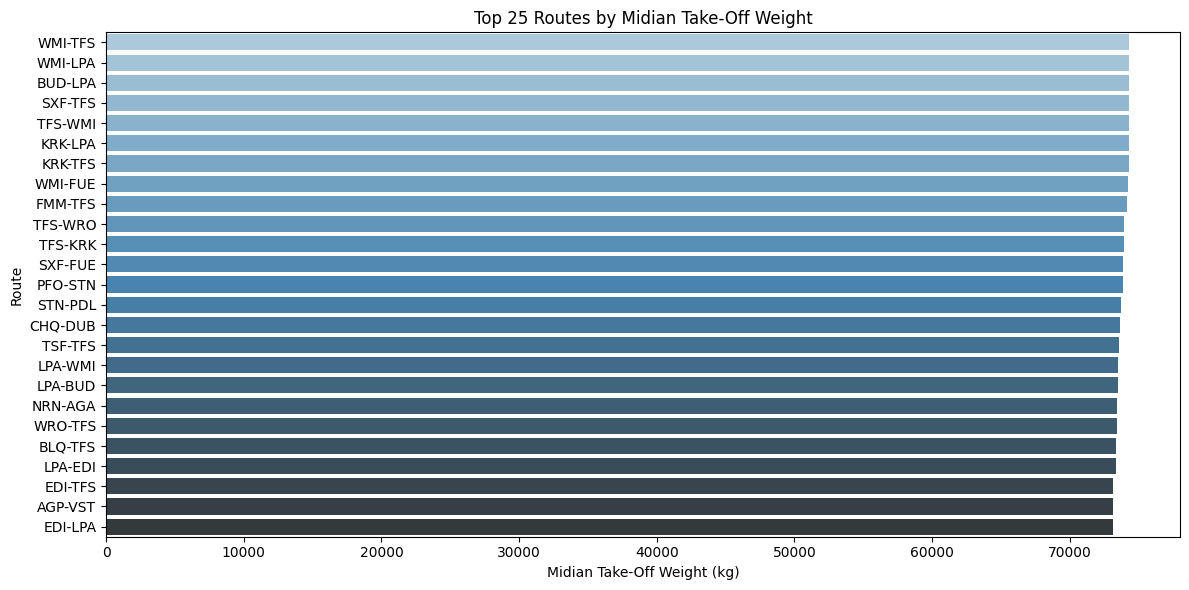

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=route_weights, x='ActualTOW', y='Route', palette='Blues_d')
plt.title('Top 25 Routes by Midian Take-Off Weight')
plt.xlabel('Midian Take-Off Weight (kg)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

In [21]:
# Route is hard to encode & DepartureAirport+ ArrivalAirport can reconstruct the route
# I already have the idea about the top 20 routes, how weight matters by route

In [22]:
df.drop(['Route'], axis=1, inplace=True)

In [23]:
fig = px.scatter(df, x='FLownPassengers', y='ActualTOW', title='Take-Off Weight vs Flown Passengers')
fig.show()
#The FLownPassengers and ActualTOW have Positive correlation

In [24]:
fig = px.scatter(df, x='ActualFlightTime', y='ActualTOW', title='Take-Off Weight vs Flown Passengers')
fig.show()
#The ActualFlightTime and ActualTOW have Positive correlation

In [ ]:
Replacing mean with Null values in the 'BagsCount' column.

In [25]:
df['BagsCount'] = pd.to_numeric(df['BagsCount'], errors='coerce')
mean_BC= df['BagsCount'].mean()
df['BagsCount'].fillna(mean_BC, inplace=True)

<ipython-input-25-87fd6ac85010>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [26]:
df['FlightBagsWeight'] = pd.to_numeric(df['FlightBagsWeight'], errors='coerce')
mean_BC= df['FlightBagsWeight'].mean()
df['FlightBagsWeight'].fillna(mean_BC, inplace=True)

<ipython-input-26-593b9aca0242>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [27]:
fig = px.scatter(df, x='BagsCount', y='FlightBagsWeight', title='FlightBagsWeight vs BagsCount')
fig.show()

In [28]:
fig = px.scatter(df, x='BagsCount', y='ActualTOW', title='ActualTOW vs BagsCount')
fig.show()

In [29]:
#I think FlightBagsWeight give me better value than BagsCount therfore:
df.drop(['BagsCount'], axis=1, inplace=True)

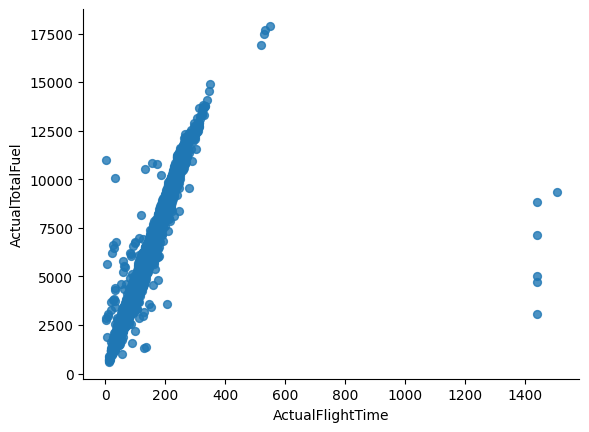

In [30]:

df.plot(kind='scatter', x='ActualFlightTime', y='ActualTotalFuel', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
fig = px.scatter(df, x='ActualFlightTime', y='FlightBagsWeight', title='Take-Off Weight vs Flown Passengers')
fig.show()
#slightly connnected

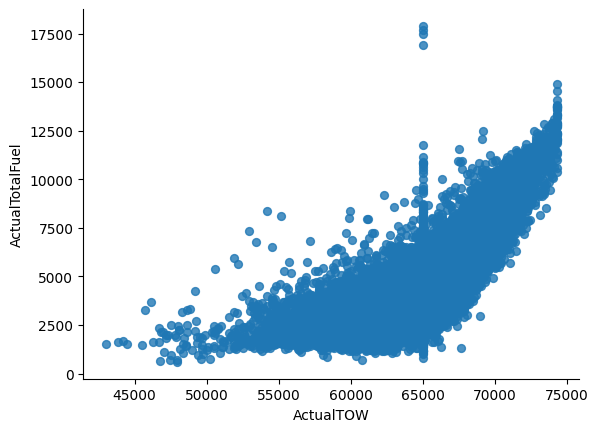

In [32]:

df.plot(kind='scatter', x='ActualTOW', y='ActualTotalFuel', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
#the more wieght the more feul

In [33]:
df['DepartureDay'] = df['DepartureDay'].apply(lambda d: f"{d:02d}.10.2016")


In [34]:
df

DepartureDay DepartureAirport ArrivalAirport  ActualFlightTime  \
0       01.10.2016              STN            ATH               185   
1       01.10.2016              ATH            STN               207   
2       01.10.2016              LGW            SNN                64   
3       01.10.2016              ATH            STN               209   
4       01.10.2016              STN            ATH               184   
...            ...              ...            ...               ...   
29726   15.10.2016              TPS            PSA                59   
29727   15.10.2016              PSA            MLA                79   
29728   15.10.2016              MLA            PSA                82   
29729   15.10.2016              PSA            PMO                60   
29730   15.10.2016              PMO            PSA                61   

       ActualTotalFuel  ActualTOW  FLownPassengers  FlightBagsWeight  
0                 7687    68696.0            149.0        550.000000  
1                 9050    71489.0            179.0       1110.000000  
2                 2720    58447.0            127.0        573.618464  
3                 9220    71399.0            189.0       1080.000000  
4                 7918    69458.0            176.0        770.000000  
...                ...        ...              ...               ...  
29726             2750    65430.0            176.0        200.000000  
29727             3400    63635.0            153.0        480.000000  
29728             3500    62093.0            160.0        299.000000  
29729             2780    64451.0            182.0        180.000000  
29730             3000    65775.0            177.0        440.000000  

[29731 rows x 8 columns]

In [35]:
df['DepartureDay'] = pd.to_datetime(df['DepartureDay'], format="%d.%m.%Y")
df['DayOfWeek'] = df['DepartureDay'].dt.day_name()
df['Weekend'] = df['DayOfWeek'].isin(['Friday','Saturday', 'Sunday'])
df['WeekDay'] = df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])
df.drop(['DepartureDay', 'DayOfWeek'], axis=1, inplace=True)

In [36]:
df['Weekend'] = df['Weekend'].apply(lambda x: 1 if x in [True, 'True'] else 0)
df['WeekDay'] = df['WeekDay'].apply(lambda x: 1 if x in [True, 'True'] else 0)

In [37]:
df

DepartureAirport ArrivalAirport  ActualFlightTime  ActualTotalFuel  \
0                  STN            ATH               185             7687   
1                  ATH            STN               207             9050   
2                  LGW            SNN                64             2720   
3                  ATH            STN               209             9220   
4                  STN            ATH               184             7918   
...                ...            ...               ...              ...   
29726              TPS            PSA                59             2750   
29727              PSA            MLA                79             3400   
29728              MLA            PSA                82             3500   
29729              PSA            PMO                60             2780   
29730              PMO            PSA                61             3000   

       ActualTOW  FLownPassengers  FlightBagsWeight  Weekend  WeekDay  
0        68696.0            149.0        550.000000        1        0  
1        71489.0            179.0       1110.000000        1        0  
2        58447.0            127.0        573.618464        1        0  
3        71399.0            189.0       1080.000000        1        0  
4        69458.0            176.0        770.000000        1        0  
...          ...              ...               ...      ...      ...  
29726    65430.0            176.0        200.000000        1        0  
29727    63635.0            153.0        480.000000        1        0  
29728    62093.0            160.0        299.000000        1        0  
29729    64451.0            182.0        180.000000        1        0  
29730    65775.0            177.0        440.000000        1        0  

[29731 rows x 9 columns]

In [38]:
df = df.dropna(subset = ['FLownPassengers'])

In [39]:
df

DepartureAirport ArrivalAirport  ActualFlightTime  ActualTotalFuel  \
0                  STN            ATH               185             7687   
1                  ATH            STN               207             9050   
2                  LGW            SNN                64             2720   
3                  ATH            STN               209             9220   
4                  STN            ATH               184             7918   
...                ...            ...               ...              ...   
29726              TPS            PSA                59             2750   
29727              PSA            MLA                79             3400   
29728              MLA            PSA                82             3500   
29729              PSA            PMO                60             2780   
29730              PMO            PSA                61             3000   

       ActualTOW  FLownPassengers  FlightBagsWeight  Weekend  WeekDay  
0        68696.0            149.0        550.000000        1        0  
1        71489.0            179.0       1110.000000        1        0  
2        58447.0            127.0        573.618464        1        0  
3        71399.0            189.0       1080.000000        1        0  
4        69458.0            176.0        770.000000        1        0  
...          ...              ...               ...      ...      ...  
29726    65430.0            176.0        200.000000        1        0  
29727    63635.0            153.0        480.000000        1        0  
29728    62093.0            160.0        299.000000        1        0  
29729    64451.0            182.0        180.000000        1        0  
29730    65775.0            177.0        440.000000        1        0  

[29636 rows x 9 columns]

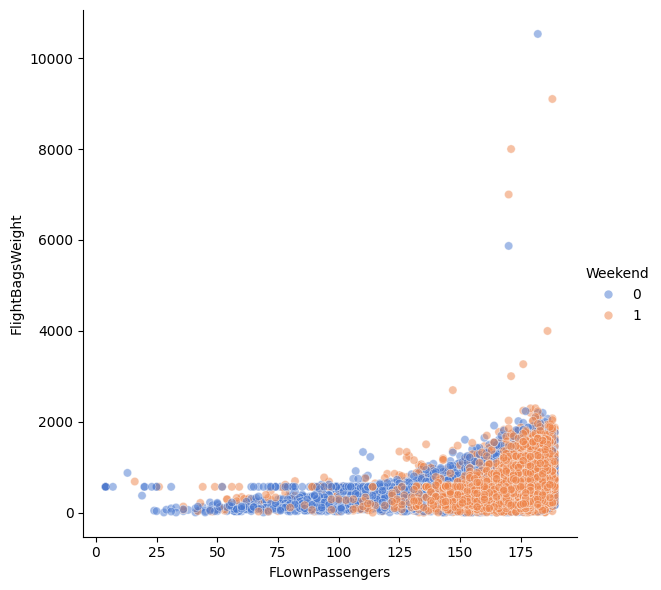

In [40]:
sns.relplot(x="FLownPassengers", y="FlightBagsWeight", hue="Weekend",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

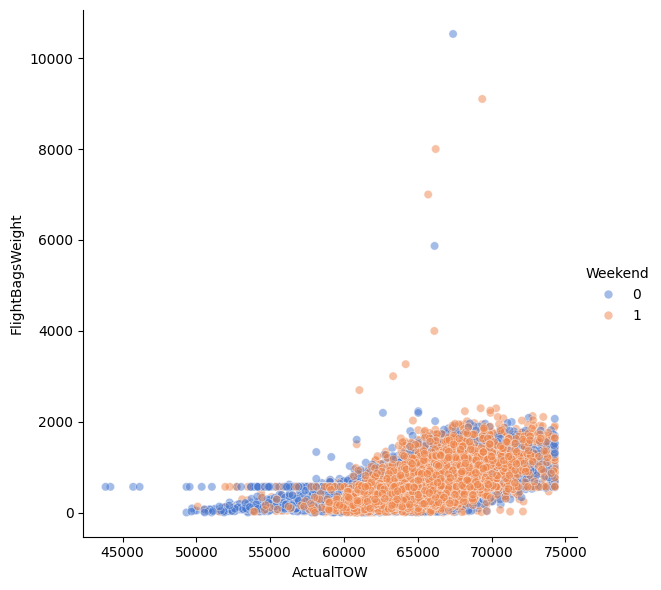

In [41]:
sns.relplot(x="ActualTOW", y="FlightBagsWeight", hue="Weekend",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [42]:
fig = px.box(df, y='ActualTOW', x='DepartureAirport')
fig.show()

In [43]:
fig = px.box(df, y='ActualTOW', x='ArrivalAirport')
fig.show()

In [149]:
#A summery of the data:

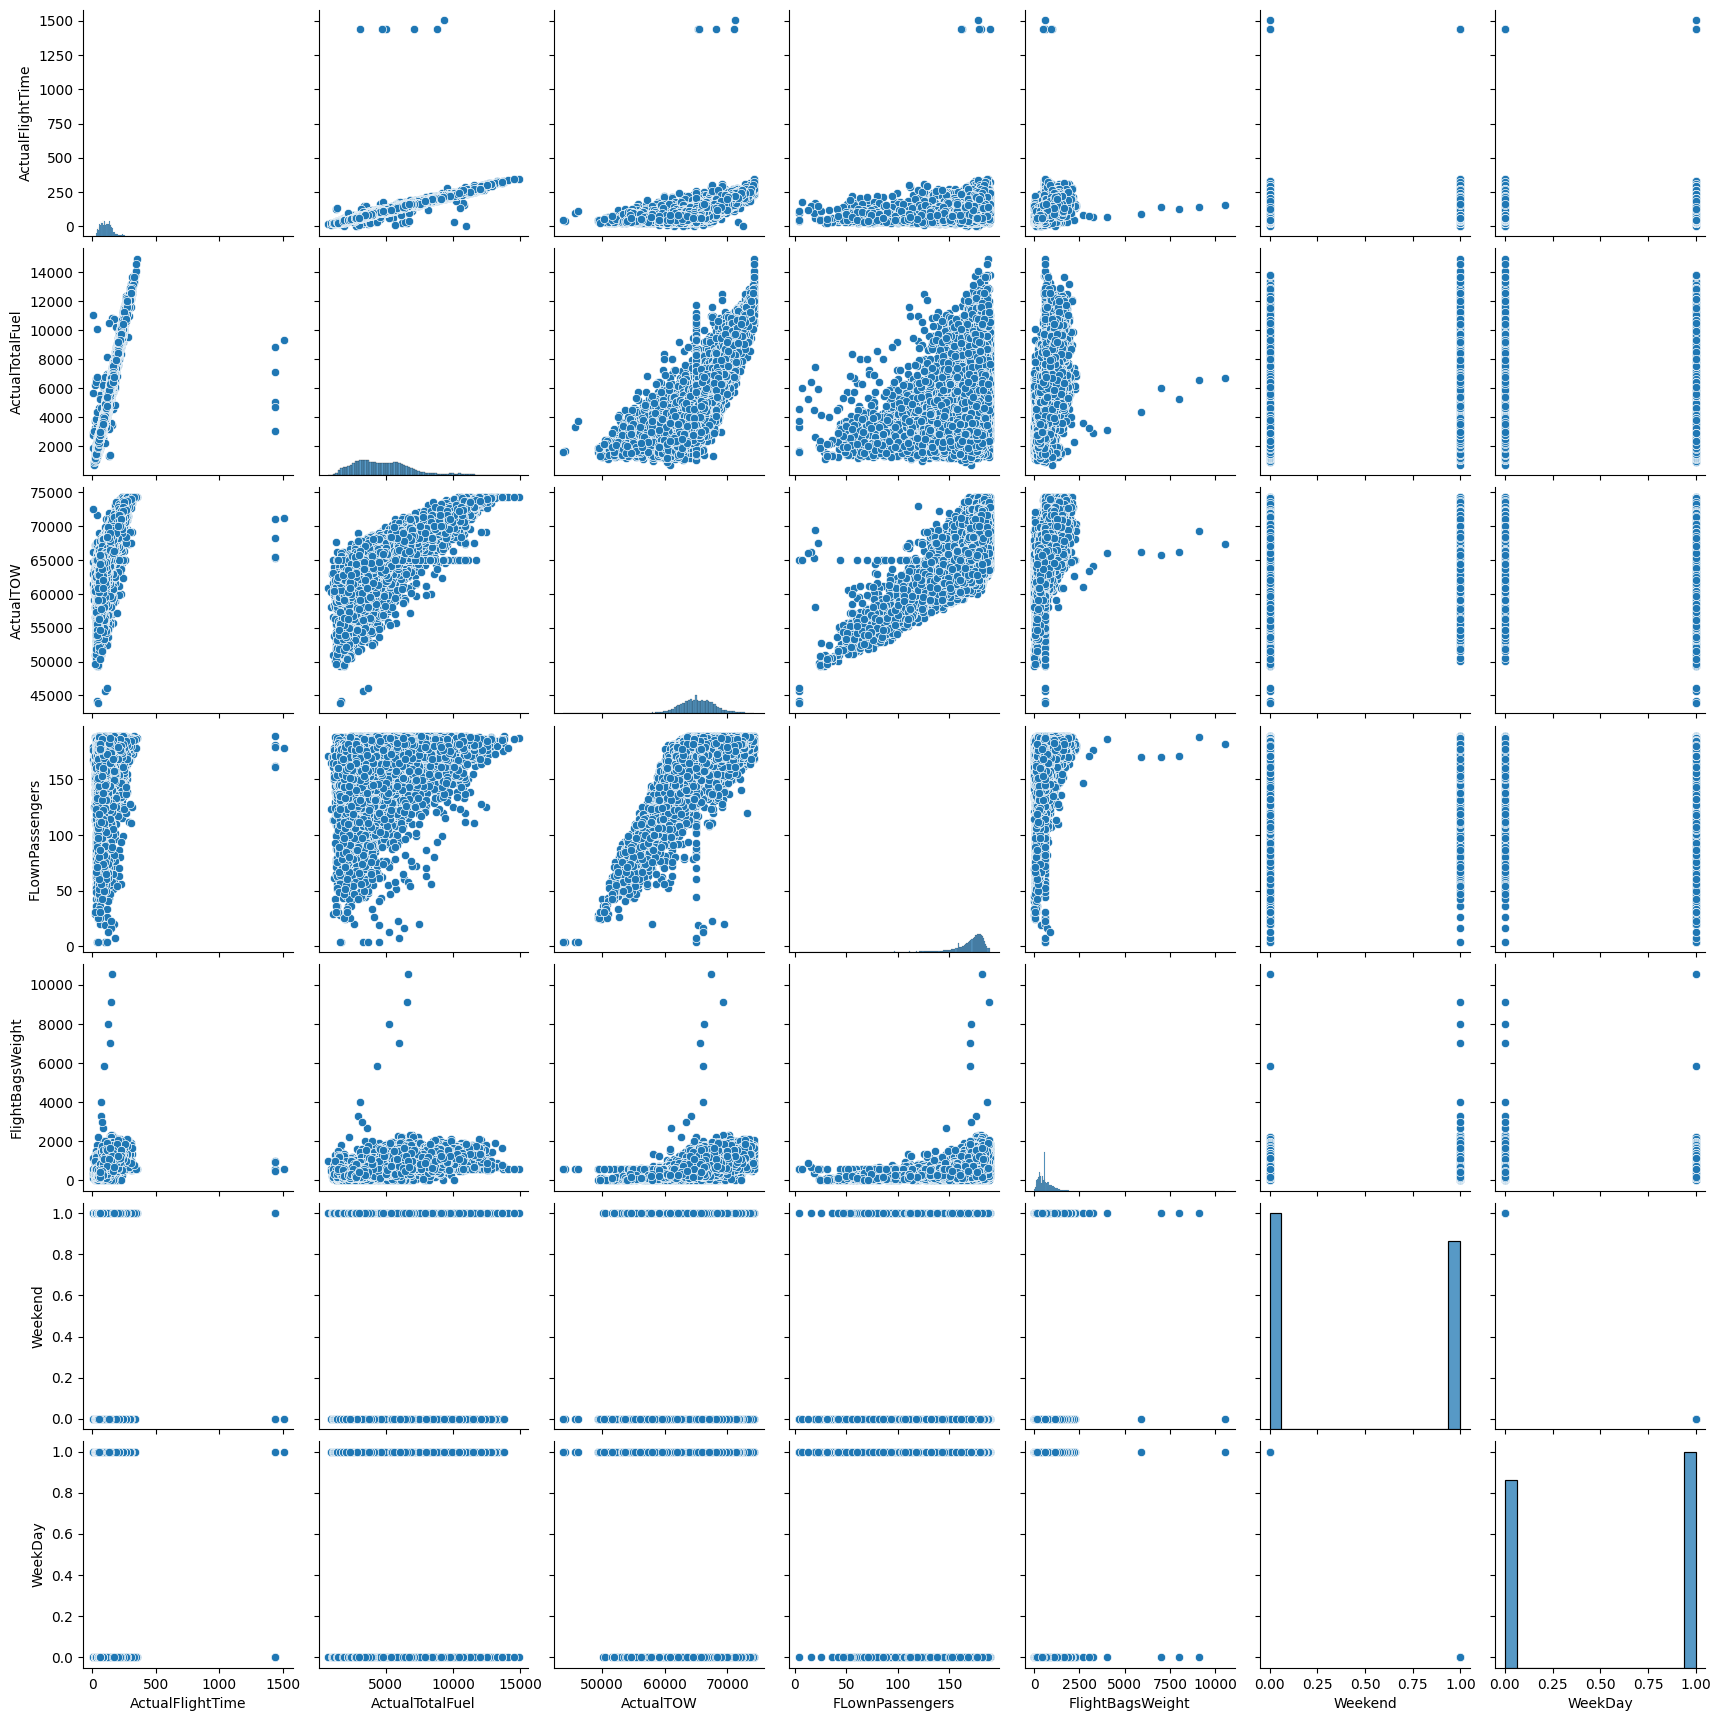

In [44]:
sns.pairplot(df)

In [45]:
#we can see the Numerical columns have normal distribuition except ActualTotalFuel which is slightly normal.

# Feature engineering

In [46]:
df.drop(['DepartureAirport', 'ArrivalAirport'], axis=1, inplace=True)

<ipython-input-46-6936cdd6a098>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
preprocessed_df=df

In [48]:
#preprocessed_df = pd.get_dummies(df, columns =['DepartureAirport', 'ArrivalAirport'], dtype = int)

In [49]:
preprocessed_df

ActualFlightTime  ActualTotalFuel  ActualTOW  FLownPassengers  \
0                   185             7687    68696.0            149.0   
1                   207             9050    71489.0            179.0   
2                    64             2720    58447.0            127.0   
3                   209             9220    71399.0            189.0   
4                   184             7918    69458.0            176.0   
...                 ...              ...        ...              ...   
29726                59             2750    65430.0            176.0   
29727                79             3400    63635.0            153.0   
29728                82             3500    62093.0            160.0   
29729                60             2780    64451.0            182.0   
29730                61             3000    65775.0            177.0   

       FlightBagsWeight  Weekend  WeekDay  
0            550.000000        1        0  
1           1110.000000        1        0  
2            573.618464        1        0  
3           1080.000000        1        0  
4            770.000000        1        0  
...                 ...      ...      ...  
29726        200.000000        1        0  
29727        480.000000        1        0  
29728        299.000000        1        0  
29729        180.000000        1        0  
29730        440.000000        1        0  

[29636 rows x 7 columns]

In [50]:
df['ActualTOW'].describe()

count    29636.000000
mean     65061.139599
std       3245.895000
min      43844.000000
25%      63163.000000
50%      65086.000000
75%      67136.000000
max      74283.000000
Name: ActualTOW, dtype: float64

In [51]:
preprocessed_df.to_csv('preprocessed_df.csv', index=False)

# Machine Learning

I am using multiple models and then coparing the result and keeping the best model as the final model

In [52]:
X = preprocessed_df.drop('ActualTOW',axis=1)
y = preprocessed_df['ActualTOW']

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Scaling the modeldata

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
joblib.dump(scaler_y, 'scaler_y.pkl')
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

#Linear regression

In [150]:

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = lr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test_scaled)
actual_mean_value= y_test_orig.mean()
print(actual_mean_value)

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mae = mean_absolute_error(y_test_orig, y_pred)
Percentage_error = (rmse/actual_mean_value)*100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(Percentage_error )

64908.111715791456
RMSE: 1030.97
MAE: 763.15
1.5883463492734635


In [77]:
y_pred_scaled.shape

(2964, 1)

Text(0, 0.5, 'Predicted Y')

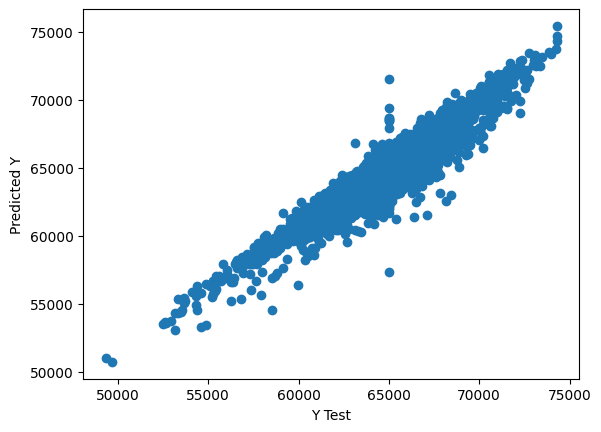

In [56]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#Neural network

In [57]:
model = Sequential()
model.add(Dense(128, input_dim=6, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [58]:
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=100)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,217 (36.00 KB)

 Trainable params: 9,217 (36.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1765 - mae: 0.2814 - val_loss: 0.1043 - val_mae: 0.2281
Epoch 2/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0992 - mae: 0.2292 - val_loss: 0.0979 - val_mae: 0.2201
Epoch 3/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1038 - mae: 0.2301 - val_loss: 0.0954 - val_mae: 0.2166
Epoch 4/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0968 - mae: 0.2234 - val_loss: 0.1053 - val_mae: 0.2237
Epoch 5/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1034 - mae: 0.2220 - val_loss: 0.0955 - val_mae: 0.2260
Epoch 6/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0928 - mae: 0.2202 - val_loss: 0.0934 - val_mae: 0.2130
Epoch 7/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0920 - mae: 0.2175 - val_loss: 0.0932 - val_mae: 0.2155
Epoch 8/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0907 - mae: 0.2171 - val_loss: 0.0958 - val_mae: 0.2132
Epoch 9/100
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/

In [59]:
y_pred_nn_scaled = model.predict(X_test_scaled)
y_pred_nn = scaler_y.inverse_transform(y_pred_nn_scaled)

rmse_nn = root_mean_squared_error(y_test_orig, y_pred_nn)
mae_nn = mean_absolute_error(y_test_orig, y_pred_nn)
print('Root mean squared error using neural network: ', rmse_nn)
print('Mean absolute error using neural network: ', mae_nn)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root mean squared error using neural network:  936.4878456004914
Mean absolute error using neural network:  665.38691735281


In [60]:
model.save('NN_model.h5')

#DecisionTreeRegressor

In [104]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
rmse_dt = root_mean_squared_error(y_test_orig, y_pred_tree)
mae_dt = mean_absolute_error(y_test_orig, y_pred_tree)
print('Root Mean squared error using decision tree: ', rmse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Root Mean squared error using decision tree:  1348.3985596649813
Mean absolute error using decision tree:  977.4858390337496


The result is worst than other models

# Validation

Uploading the clean validation dataset

In [62]:
uploaded= files.upload()

Saving EVA.csv to EVA.csv


In [113]:
validation_X = pd.read_csv('EVA.csv')

In [114]:
validation_X

ActualFlightTime  ActualTotalFuel  FLownPassengers  FlightBagsWeight  \
0                   84             3630            185.0        560.000000   
1                   86             3690            188.0        446.149087   
2                  100             4390            168.0        720.000000   
3                  100             4690            185.0        460.000000   
4                  112             4900            167.0        400.000000   
...                ...              ...              ...               ...   
1873                60             2775            173.0        160.000000   
1874                99             4120            183.0        270.000000   
1875               104             4230            182.0        400.000000   
1876                59             2671            169.0        130.000000   
1877                60             2460            176.0         90.000000   

      Weekend  WeekDay  
0           0        1  
1           0        1  
2           0        1  
3           0        1  
4           0        1  
...       ...      ...  
1873        0        1  
1874        0        1  
1875        0        1  
1876        0        1  
1877        0        1  

[1878 rows x 6 columns]

In [115]:
X_scaled = scaler.fit_transform(validation_X)

In [133]:
model = load_model('NN_model.h5')
scaler_y = joblib.load('scaler_y.pkl')

In [134]:
prediction_scaled = model.predict(X_scaled)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [135]:
prediction_scaled

array([[-0.03154223],
       [ 0.01936594],
       [ 0.12347712],
       ...,
       [ 0.02913658],
       [-0.5160064 ],
       [-0.74027234]], dtype=float32)

In [128]:
#scaler_y = StandardScaler()
#scaler_y.fit(prediction_scaled)

StandardScaler()

In [136]:
scaler_y = joblib.load('scaler_y.pkl')
prediction_original = scaler_y.inverse_transform(prediction_scaled)

In [137]:
prediction_original

array([[64975.637],
       [65141.082],
       [65479.438],
       ...,
       [65172.836],
       [63401.156],
       [62672.305]], dtype=float32)

In [146]:
prediction_df = pd.DataFrame(prediction_original, columns=['PredictedTOW'])
prediction_df.to_csv('prediction_original.csv', sep=',')